In [15]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#change working directory
import os
os.chdir(r'C:\Users\Evan Generoli\Downloads')

In [17]:
# read in dataset
dat = pd.read_csv('HealthDat.csv', index_col=0)
dat.shape

(51424, 15)

In [18]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51424 entries, 1 to 51424
Data columns (total 15 columns):
YEAR         51424 non-null int64
AGE          51424 non-null int64
SEX          51424 non-null int64
MARSTAT      51424 non-null int64
BIRTHMO      51424 non-null object
HEALTH       51424 non-null object
BMI          51424 non-null float64
WHITE        51424 non-null int64
BLACK        51424 non-null int64
ASIAN        51424 non-null int64
HS           51424 non-null int64
COL          51424 non-null int64
INCOME       51424 non-null object
ALCOHOL      51424 non-null int64
CIGARETTE    51424 non-null float64
dtypes: float64(2), int64(10), object(3)
memory usage: 6.3+ MB


In [19]:
dat.head()

,YEAR,AGE,SEX,MARSTAT,BIRTHMO,HEALTH,BMI,WHITE,BLACK,ASIAN,HS,COL,INCOME,ALCOHOL,CIGARETTE
1,2000,36,1,1,Dec,Excellent,20.68,1,0,0,0,0,Low Income,1,2.0
2,2000,36,1,0,Nov,Excellent,25.53,1,0,0,0,0,Middle Income,2,2.0
3,2000,37,1,0,Jan,Very Good,24.99,1,0,0,1,0,Low Income,6,2.0
4,2000,51,0,0,Aug,Good,22.21,1,0,0,0,1,Low Income,1,2.0
5,2000,29,0,0,Oct,Very Good,22.72,1,0,0,0,1,Low Income,2,0.3


In [21]:
## make column names lower case
dat.columns = [x.lower() for x in dat.columns]
dat.head()
# alternate way
# dat.rename(str.lower, axis='columns')

,year,age,sex,marstat,birthmo,health,bmi,white,black,asian,hs,col,income,alcohol,cigarette
1,2000,36,1,1,Dec,Excellent,20.68,1,0,0,0,0,Low Income,1,2.0
2,2000,36,1,0,Nov,Excellent,25.53,1,0,0,0,0,Middle Income,2,2.0
3,2000,37,1,0,Jan,Very Good,24.99,1,0,0,1,0,Low Income,6,2.0
4,2000,51,0,0,Aug,Good,22.21,1,0,0,0,1,Low Income,1,2.0
5,2000,29,0,0,Oct,Very Good,22.72,1,0,0,0,1,Low Income,2,0.3


In [22]:
dat.columns

Index(['year', 'age', 'sex', 'marstat', 'birthmo', 'health', 'bmi', 'white',
       'black', 'asian', 'hs', 'col', 'income', 'alcohol', 'cigarette'],
      dtype='object')

In [8]:
# replace health (categorical) with dummy variables

right = pd.get_dummies(dat.health) # get dataframe of health category dummy variables
right.columns = [x + ' health' for x in right.columns]

left = dat.drop(columns='health') # get dataframe w/ health dropped

dat = left.join(right) # join two dataframes into one


dat.columns = [x.lower() for x in dat.columns] #make sure all column names are lower case
dat.head()

,year,age,sex,marstat,birthmo,bmi,white,black,asian,hs,col,income,alcohol,cigarette,excellent health,fair health,good health,poor health,very good health
1,2000,36,1,1,Dec,20.68,1,0,0,0,0,Low Income,1,2.0,1,0,0,0,0
2,2000,36,1,0,Nov,25.53,1,0,0,0,0,Middle Income,2,2.0,1,0,0,0,0
3,2000,37,1,0,Jan,24.99,1,0,0,1,0,Low Income,6,2.0,0,0,0,0,1
4,2000,51,0,0,Aug,22.21,1,0,0,0,1,Low Income,1,2.0,0,0,1,0,0
5,2000,29,0,0,Oct,22.72,1,0,0,0,1,Low Income,2,0.3,0,0,0,0,1


In [9]:
# replace income (categorical) with dummy variables

right = pd.get_dummies(dat.income) # get dataframe of health category dummy variables

left = dat.drop(columns='income') # get dataframe w/ health dropped

dat = left.join(right) # join two dataframes into one


dat.columns = [x.lower() for x in dat.columns] #make sure all column names are lower case
dat.head()

,year,age,sex,marstat,birthmo,bmi,white,black,asian,hs,...,alcohol,cigarette,excellent health,fair health,good health,poor health,very good health,high income,low income,middle income
1,2000,36,1,1,Dec,20.68,1,0,0,0,...,1,2.0,1,0,0,0,0,0,1,0
2,2000,36,1,0,Nov,25.53,1,0,0,0,...,2,2.0,1,0,0,0,0,0,0,1
3,2000,37,1,0,Jan,24.99,1,0,0,1,...,6,2.0,0,0,0,0,1,0,1,0
4,2000,51,0,0,Aug,22.21,1,0,0,0,...,1,2.0,0,0,1,0,0,0,1,0
5,2000,29,0,0,Oct,22.72,1,0,0,0,...,2,0.3,0,0,0,0,1,0,1,0


In [23]:
# drop year & birthmonth

dat = dat.drop(columns=['year','birthmo'])
dat.head()

,age,sex,marstat,health,bmi,white,black,asian,hs,col,income,alcohol,cigarette
1,36,1,1,Excellent,20.68,1,0,0,0,0,Low Income,1,2.0
2,36,1,0,Excellent,25.53,1,0,0,0,0,Middle Income,2,2.0
3,37,1,0,Very Good,24.99,1,0,0,1,0,Low Income,6,2.0
4,51,0,0,Good,22.21,1,0,0,0,1,Low Income,1,2.0
5,29,0,0,Very Good,22.72,1,0,0,0,1,Low Income,2,0.3


In [11]:
# data is good to go for EDA

dat.describe().round()

,age,sex,marstat,bmi,white,black,asian,hs,col,alcohol,cigarette,excellent health,fair health,good health,poor health,very good health,high income,low income,middle income
count,51424.0,51424.0,51424.0,51424.0,51424.0,51424.0,51424.0,51424.0,51424.0,51424.0,51424.0,51424.0,51424.0,51424.0,51424.0,51424.0,51424.0,51424.0,51424.0
mean,43.0,1.0,0.0,27.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,14.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,22.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,31.0,0.0,0.0,23.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,42.0,1.0,0.0,26.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,53.0,1.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
max,85.0,1.0,1.0,86.0,1.0,1.0,1.0,1.0,1.0,95.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [14]:
dat.describe().round(2)

,age,sex,marstat,bmi,white,black,asian,hs,col,alcohol,cigarette,excellent health,fair health,good health,poor health,very good health,high income,low income,middle income
count,51424.00,51424.00,51424.00,51424.00,51424.00,51424.00,51424.00,51424.00,51424.00,51424.00,51424.00,51424.00,51424.00,51424.00,51424.00,51424.00,51424.00,51424.00,51424.00
mean,42.90,0.53,0.36,26.96,0.78,0.15,0.02,0.34,0.26,3.29,1.33,0.21,0.12,0.31,0.04,0.32,0.04,0.74,0.22
std,13.86,0.50,0.48,5.83,0.41,0.36,0.16,0.47,0.44,3.48,0.99,0.41,0.33,0.46,0.19,0.47,0.21,0.44,0.41
min,22.00,0.00,0.00,7.84,0.00,0.00,0.00,0.00,0.00,1.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,31.00,0.00,0.00,22.97,1.00,0.00,0.00,0.00,0.00,2.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,42.00,1.00,0.00,25.84,1.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,53.00,1.00,1.00,29.83,1.00,0.00,0.00,1.00,1.00,4.00,2.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
max,85.00,1.00,1.00,85.81,1.00,1.00,1.00,1.00,1.00,95.00,9.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [60]:
dat.corr().round(2)

,age,sex,marstat,bmi,white,black,asian,hs,col,alcohol,cigarette
age,1.00,0.01,0.07,-0.03,0.01,0.04,-0.05,0.01,-0.01,-0.14,0.16
sex,0.01,1.00,0.05,0.02,0.00,-0.02,0.06,0.01,-0.02,0.17,0.11
marstat,0.07,0.05,1.00,0.02,0.13,-0.14,0.02,0.03,0.01,-0.05,0.03
bmi,-0.03,0.02,0.02,1.00,-0.07,0.09,-0.06,0.01,-0.04,0.04,-0.00
white,0.01,0.00,0.13,-0.07,1.00,-0.80,-0.30,0.01,0.05,0.04,0.16
black,0.04,-0.02,-0.14,0.09,-0.80,1.00,-0.07,0.01,-0.08,-0.06,-0.13
asian,-0.05,0.06,0.02,-0.06,-0.30,-0.07,1.00,-0.04,0.07,-0.02,-0.07
hs,0.01,0.01,0.03,0.01,0.01,0.01,-0.04,1.00,-0.42,0.02,0.08
col,-0.01,-0.02,0.01,-0.04,0.05,-0.08,0.07,-0.42,1.00,-0.07,-0.11
alcohol,-0.14,0.17,-0.05,0.04,0.04,-0.06,-0.02,0.02,-0.07,1.00,0.07


In [268]:
dat[['white','black','asian']].corr().round(2)

,white,black,asian
white,1.0,-0.80,-0.30
black,-0.8,1.00,-0.07
asian,-0.3,-0.07,1.00


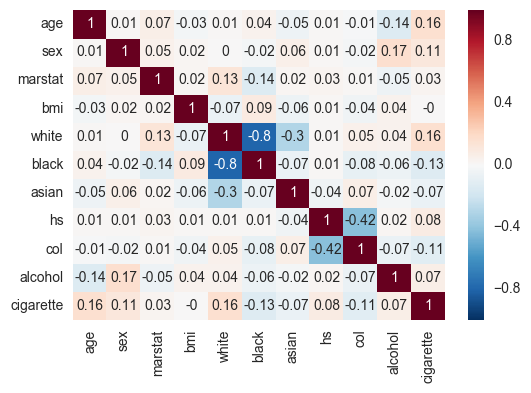

In [59]:
sns.heatmap(dat.corr().round(2), annot=True)

In [ ]:
#### begin cluster analysis

In [233]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [234]:
kmeans.cluster_centers_

array([[  6.33995744e+01,   5.49634564e-01,   3.73762605e-01,
          2.61511361e+01,   7.89157184e-01,   1.65047645e-01,
          1.56351189e-02,   3.36478860e-01,   2.42020538e-01,
          2.57017300e+00,   1.49239523e+00,   1.38125636e-01,
          1.93079841e-01,   3.30650384e-01,   6.86464983e-02,
          2.69497641e-01,   4.26496438e-02,   8.17004348e-01,
          1.40346008e-01],
       [  2.94542197e+01,   5.29753547e-01,   3.09882342e-01,
          2.69210662e+01,   7.85261221e-01,   1.32668377e-01,
          3.34576091e-02,   3.22858665e-01,   2.57783373e-01,
          3.79731758e+00,   1.12309592e+00,   2.73083813e-01,
          7.87779015e-02,   2.78167821e-01,   1.30731613e-02,
          3.56897303e-01,   2.83251828e-02,   7.70202876e-01,
          2.01471941e-01],
       [  4.57171125e+01,   5.26851017e-01,   4.07975153e-01,
          2.74308015e+01,   7.75974351e-01,   1.65364192e-01,
          2.07394049e-02,   3.54022643e-01,   2.59843703e-01,
          3.1668

In [257]:
x = kmeans.labels_
print(x)
print('length: ' + str(len(x)))

[1 1 1 ..., 2 1 0]
length: 51424


In [247]:
kmeans.inertia_.round()

3958731.0

In [259]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dat)
    inertia.append(kmeans.inertia_)

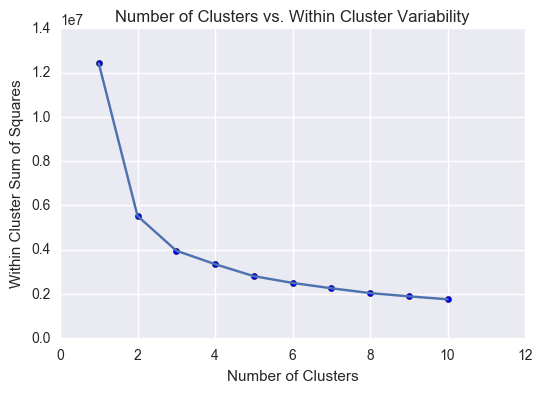

In [260]:
index = list(range(1, 11))
plt.scatter(index, inertia)
plt.plot(index, inertia)
plt.ylabel('Within Cluster Sum of Squares')
plt.xlabel('Number of Clusters')
plt.title('Number of Clusters vs. Within Cluster Variability')

In [ ]:
# import function for transforming categoricals into dummies

from sklearn.preprocessing import LabelEncoder()

In [26]:
dat.head()

,age,sex,marstat,health,bmi,white,black,asian,hs,col,income,alcohol,cigarette
1,36,1,1,Excellent,20.68,1,0,0,0,0,Low Income,1,2.0
2,36,1,0,Excellent,25.53,1,0,0,0,0,Middle Income,2,2.0
3,37,1,0,Very Good,24.99,1,0,0,1,0,Low Income,6,2.0
4,51,0,0,Good,22.21,1,0,0,0,1,Low Income,1,2.0
5,29,0,0,Very Good,22.72,1,0,0,0,1,Low Income,2,0.3


In [ ]:
from mlxtend.plotting import category_scatter

fig = category_scatter(x='x', y='y', label_col='label', 
                       data=df, legend_loc='upper left')

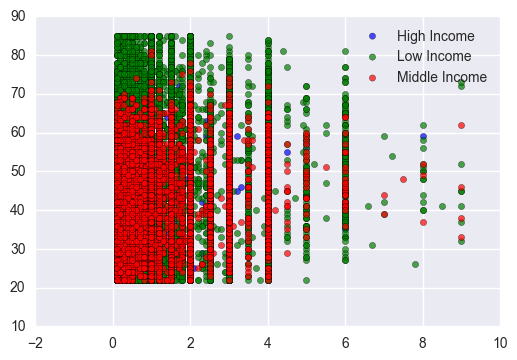

In [53]:
from mlxtend.plotting import category_scatter

fig = category_scatter(x='cigarette',y='age',label_col='income', data=dat, markers = 'o')

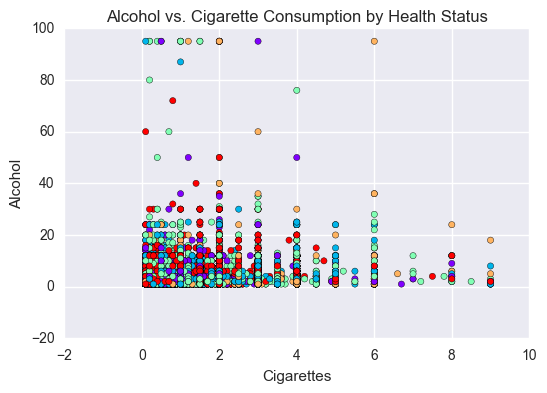

In [58]:
color_codes = dat.health.astype('category').cat.codes
plt.scatter(x=dat.cigarette, y=dat.alcohol, c= color_codes, cmap='rainbow')

plt.ylabel('Alcohol')
plt.xlabel('Cigarettes')
plt.title('Alcohol vs. Cigarette Consumption by Health Status')